# Data visualization: Energy 
---
#### Anthony de los Santos


La idea es presentar una comparación de genereación de energía eléctrica por fuentes renovables, en este caso 
por recurso solar, en paises de America Latina *(en específico: Uruguay, Argentina, Brasil, Chile, Paraguay)*.

Para esto, tomamos un dataset "energy.csv" desde la página de owd, "ourworldindata.org", y pasamos a su análisis. 

---

In [1]:
# import de paquetes 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import plotly, para gráficos interactivos. 
import plotly.express as px



In [2]:
# carga de datos 

data = pd.read_csv("energy.csv")
data.head()


,Entity,Code,Year,Electricity from solar (TWh)
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0


In [3]:
#
# Interesa aquellos datos entre 2010 y 2020 ... 
#

data = data.loc[ data["Year"] > 2010 ].loc[ data["Year"] <= 2020 ]
data.head()


,Entity,Code,Year,Electricity from solar (TWh)
11,Afghanistan,AFG,2011,0.00
12,Afghanistan,AFG,2012,0.03
13,Afghanistan,AFG,2013,0.03
14,Afghanistan,AFG,2014,0.03
15,Afghanistan,AFG,2015,0.03


In [4]:
#
# Filtro de paises Latam 
#

# Paises para analizar
paisesLatam = ["Uruguay","Argentina","Brazil","Paraguay","Chile"] 

solar = data.columns[-1] # Columna con los valores de energía solar  

def dataLatam( pais , plot = 0):    
    
    d = data.loc[ data["Entity"] == pais ]
    
    if plot == 1:        
        plt.plot( d["Year"], d[solar] , color = "darkred" ,lw = 2)
        
        plt.title(" Generación de energía eléctrica por recurso solar, medido en TWh/año " , fontsize=15, color="red" )
        plt.xlabel("Años", fontsize = 11)
        plt.ylabel(" TWh ", fontsize = 11)
        
        plt.grid()
        plt.show()
        
        
    return d
       


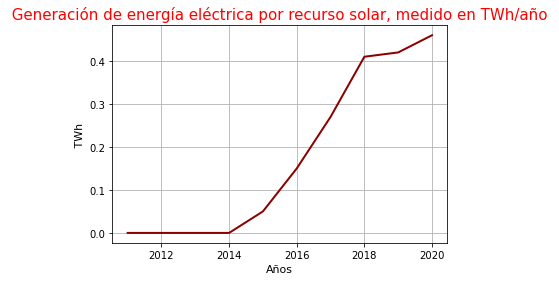

In [5]:
#
# Un simple plot con datos de Uruguay ...
#

uru = dataLatam( "Uruguay", 1 )
 


In [45]:
#
# Creamos el data frame con los paises de interes ( paisesLatam )
#

df = dataLatam( paisesLatam[0] )

for i in range(1,len(paisesLatam)):
    df = pd.concat( [ df, dataLatam( paisesLatam[i] ) ] )

#df

In [46]:
#
# Comparativa entre paises, con plotly ... 
#

px.line(df, x="Year", y = solar, color= "Entity").show()

    



In [65]:
#
# Medias de generación eléctrica ...
#

energyMean = [ dataLatam( paisesLatam[i] ).mean()[1] for i in range( len(paisesLatam) ) ]

medias = pd.DataFrame( { "Paises": paisesLatam, "media_Energia": energyMean } )
medias


,Paises,media_Energia
0,Uruguay,0.176
1,Argentina,0.234
2,Brazil,2.188
3,Paraguay,0.000
4,Chile,2.704
